## Classifieur k-NN 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

os.chdir('C:/Users/chouchou/Desktop/safa/M2 TIDE/App_stat/Robert')

df_VR = pd.read_csv("winequality-red.csv",sep=";")


#### Selection des variables significatives

In [2]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
a=sel.fit_transform(df_VR)

#### Standardisation des variables significatives

In [3]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
listofnames=df_VR.drop(['citric acid',
                        'chlorides','density','pH','sulphates','alcohol','quality'],axis=1).columns
scaled_features=st_x.fit_transform(df_VR.drop(['citric acid',
                        'chlorides','density','pH','sulphates','alcohol','quality'], axis=1))
scaled_data = pd.DataFrame(data=scaled_features, columns = listofnames)

#Extracting Independent and dependent Variable  
x= scaled_data
y= df_VR['quality']

#### Découpage du dataset en données d'entraînement et données test

In [4]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

#### Appliquer les données d'entraînement dans le classifieur k-NN  
 

Ici nous allons utiliser GridSearch pour obtenir le/les meilleur/s paremètre/s de la fonction k-NN pour notre modèle

In [7]:
parametres= [{"n_neighbors": np.arange(1,201,1), 
             }]

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

gridsearch_u = GridSearchCV(KNeighborsClassifier("n_neighbors",weights='uniform'), parametres , scoring='accuracy')
print(gridsearch_u.fit(x_train,y_train).best_params_)

{'n_neighbors': 90}


Maintenant que nous connaissons le meilleur "n_neighbors" à choisir pour notre modèle, nous pouvons lancer notre classifieur avec le paramètre choisi par GridSearch :

In [16]:
classifier= KNeighborsClassifier(n_neighbors=90)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=90)

#### Affichage des clusters

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

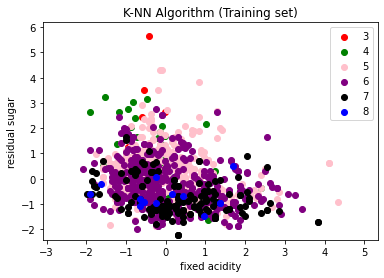

In [20]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 3].min() - 1, stop = x_set[:, 3].max() + 1, step = 0.01))

plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green','pink','purple','black','blue'))(i), label = j)  
plt.title('K-NN Algorithm (Training set)')  
plt.xlabel('fixed acidity')  
plt.ylabel('residual sugar')  
plt.legend()  
plt.show()  

#### Testons le score de notre modèle de prediction

Nous allons tester notre score à l'aide des fonction recall_score et precision_score qui utilise les données d'une matrice de confusion (données vrai positif/ faux positif etc..). recall_score calcul un ratio qui permet de tester la capacité du classifieur à trouver des vrais positifs. 
precision_score lui calcul un ratio qui permet de tester la capacité du classieur à ne pas classifier un point comme positif s'il est négatif.

In [21]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred,average = 'weighted')
recall = recall_score(y_test,y_pred,average = 'weighted')

print(precision)
print(recall)

0.5013623097384365
0.55


Nous avons donc un score de 0.5 pour le precision et de 0.55 pour le recall qui sont des score satisfaisant